In [ ]:
#all_slow

# Running Experiments
> A quick walkthrough on running experiments as designed in this library.

In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#hide
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [ ]:
from lemonpie.basics import *
from lemonpie.preprocessing.transform import *
from lemonpie.experiment import *
from fastai.imports import *

> Note: This assumes you have run the previous 'quick walkthrough' and have the 1K dataset setup and pre-processed.

## LSTM

In [ ]:
labels = ['diabetes', 'stroke', 'alzheimers', 'coronary_heart', 'breast_cancer', 'epilepsy']

First, we create an experiment with minimal settings, default values will be used for the rest.

In [ ]:
lstm_base = Experiment.create('lstm_base', 'baseline for LSTMs', PATH_1K, labels, 'Adagrad', 'LSTM')

Print out details of the experiment config

In [ ]:
lstm_base 

{ 'name': 'lstm_base',
  'path': '/home/vinod/.lemonpie/experiments',
  'desc': 'baseline for LSTMs',
  'checkpoint_path': '/home/vinod/.lemonpie/models'}
{ 'data_params': { 'dataset_path': '/home/vinod/.lemonpie/datasets/synthea/1K',
                   'labels': [ 'diabetes', 'stroke', 'alzheimers',
                               'coronary_heart', 'breast_cancer', 'epilepsy'],
                   'age_start': 0,
                   'age_stop': 20,
                   'age_in_months': False,
                   'bs': 128,
                   'num_workers': 0,
                   'lazy_load_gpu': True},
  'optim_params': { 'optim': 'Adagrad',
                    'lr': 0.01,
                    'lr_decay': 0,
                    'weight_decay': 0},
  'model_params': { 'model': 'LSTM',
                    'αd': 0.5736,
                    'linear_layers': 4,
                    'initrange': 0.3,
                    'bn': False,
                    'input_drp': 0.3,
                    'linear_d

Run fit with mostly default settings

epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
    0 |          9.496 | [0.554 0.564 0.672 0.537]              1.339 | [0.658 0.780 0.945 0.856]
    2 |          1.029 | [0.720 0.892 0.938 0.739]              1.043 | [0.677 0.760 0.987 0.827]
    4 |          0.983 | [0.775 0.880 0.950 0.782]              1.225 | [0.665 0.747 0.984 0.849]
    6 |          0.779 | [0.822 0.934 0.960 0.776]              1.051 | [0.681 0.753 0.978 0.852]
    9 |          0.560 | [0.856 0.959 0.963 0.891]              1.327 | [0.671 0.763 0.964 0.837]
Checkpointed to "/home/vinod/.lemonpie/models/lstm_base/checkpoint.tar"
Saved experiment to /home/vinod/.lemonpie/experiments/lstm_base/lstm_base.experiment
No experiment settings file found, so creating it ..
Saved experiment settings to /home/vinod/.lemonpie/experiments/lstm_base/experiment.yaml


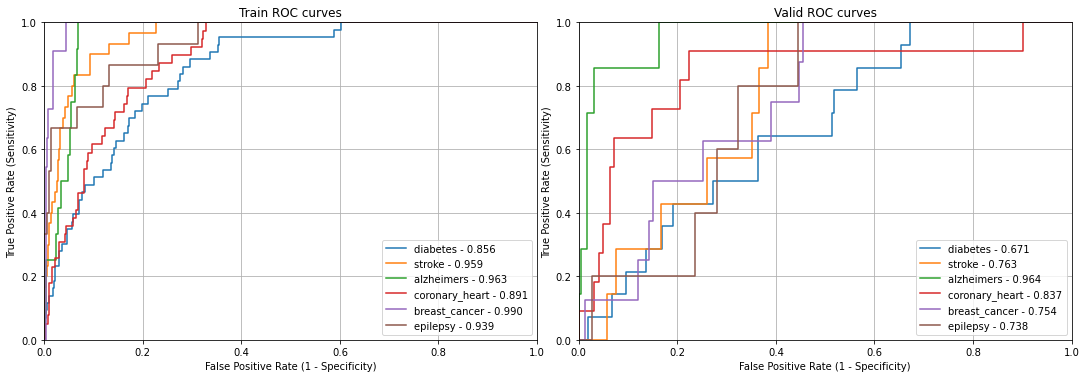

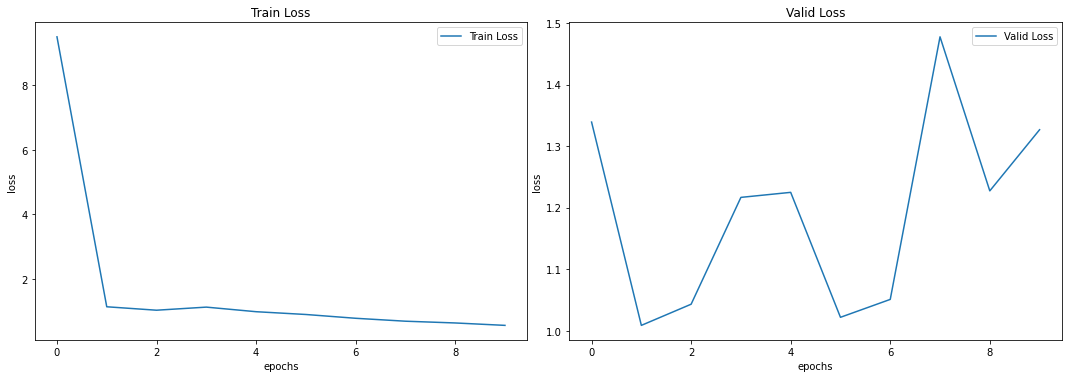

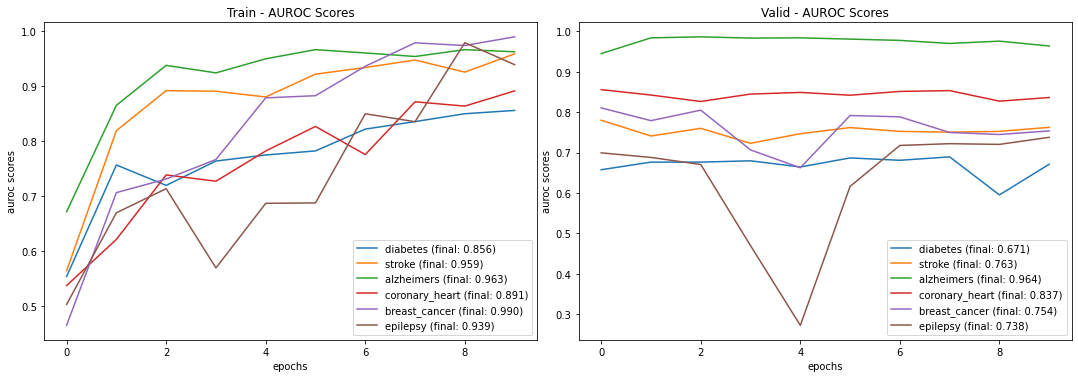

In [ ]:
lstm_base.fit(10, verbosity=.5)

Load the saved experiment

In [ ]:
lstm_base_reloaded = Experiment.load('lstm_base')

Loaded experiment from /home/vinod/.lemonpie/experiments/lstm_base/lstm_base.experiment


To resume training - load model from checkpoint, to restart training from scratch, don't load from checkpoint.

From "/home/vinod/.lemonpie/models/lstm_base/checkpoint.tar", loading model ...
loading optimizer and epoch_index ...
epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
   10 |          0.533 | [0.806 0.957 0.978 0.908]              1.423 | [0.694 0.768 0.965 0.841]
   12 |          0.421 | [0.921 0.955 0.992 0.901]              1.853 | [0.670 0.770 0.962 0.833]
   14 |          0.393 | [0.914 0.961 0.982 0.939]              2.153 | [0.653 0.783 0.965 0.795]
Checkpointed to "/home/vinod/.lemonpie/models/lstm_base/checkpoint.tar"
Saved experiment to /home/vinod/.lemonpie/experiments/lstm_base/lstm_base.experiment


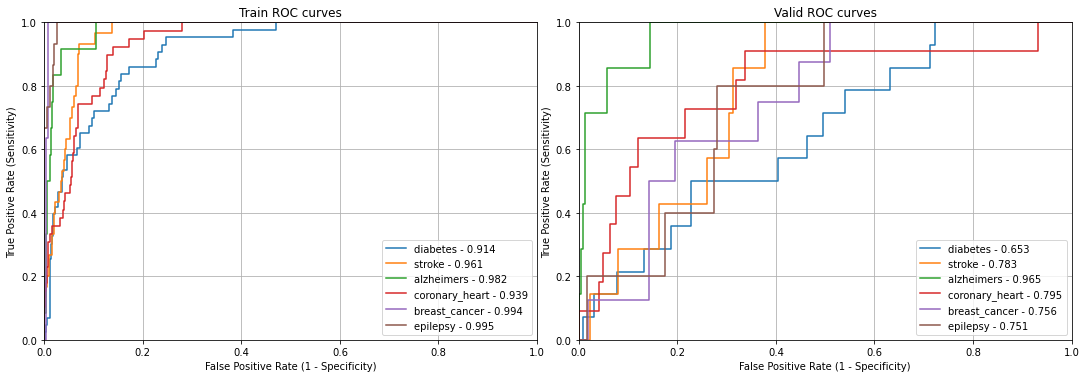

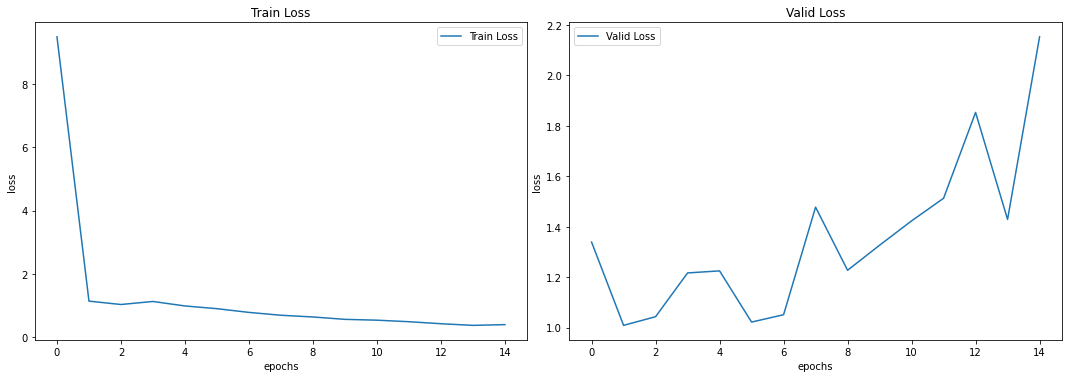

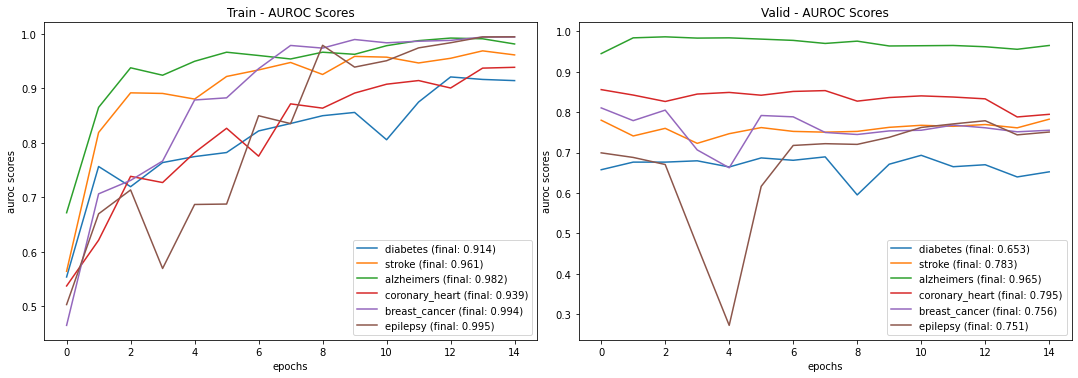

In [ ]:
lstm_base_reloaded.fit(5, from_checkpoint=True)

Run predict on the test dataset
- this will do everything needed to load the test dataset first then run predict

From "/home/vinod/.lemonpie/models/lstm_base/checkpoint.tar", loading model ...
test loss = 2.0515825748443604
test aurocs = [0.666423 0.87987  0.934498 0.821023 0.845494 0.697425]

Prediction Summary ...
                auroc_score  optimal_threshold     auroc_95_ci
diabetes           0.666423           0.122650  (0.535, 0.784)
stroke             0.879870           0.650149  (0.774, 0.962)
alzheimers         0.934498           0.745084  (0.899, 0.966)
coronary_heart     0.821023           0.206393  (0.688, 0.932)
breast_cancer      0.845494           0.044393  (0.682, 0.987)
epilepsy           0.697425           0.005640  (0.534, 0.863)
Saved experiment to /home/vinod/.lemonpie/experiments/lstm_base/lstm_base.experiment


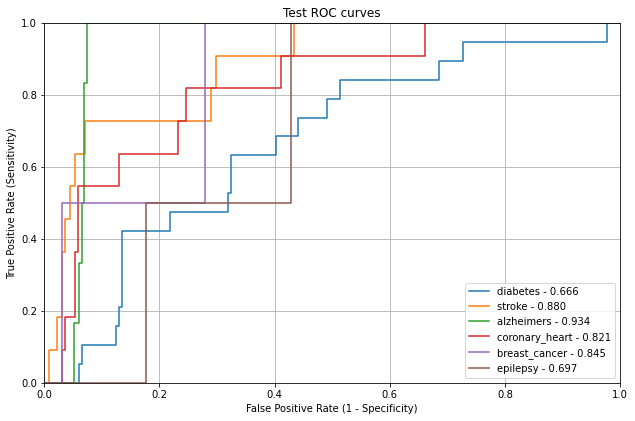

In [ ]:
lstm_base_reloaded.predict()

## CNN

Create a CNN experiment with minimal settings, default for the rest.

In [ ]:
cnn_base = Experiment.create('cnn_base', 'baseline for CNNs', PATH_1K, labels, 'Adagrad', 'CNN')

In [ ]:
cnn_base

{ 'name': 'cnn_base',
  'path': '/home/vinod/.lemonpie/experiments',
  'desc': 'baseline for CNNs',
  'checkpoint_path': '/home/vinod/.lemonpie/models'}
{ 'data_params': { 'dataset_path': '/home/vinod/.lemonpie/datasets/synthea/1K',
                   'labels': [ 'diabetes', 'stroke', 'alzheimers',
                               'coronary_heart', 'breast_cancer', 'epilepsy'],
                   'age_start': 0,
                   'age_stop': 20,
                   'age_in_months': False,
                   'bs': 128,
                   'num_workers': 0,
                   'lazy_load_gpu': True},
  'optim_params': { 'optim': 'Adagrad',
                    'lr': 0.01,
                    'lr_decay': 0,
                    'weight_decay': 0},
  'model_params': { 'model': 'CNN',
                    'αd': 0.5736,
                    'linear_layers': 4,
                    'initrange': 0.3,
                    'bn': False,
                    'input_drp': 0.3,
                    'linear_drp'

epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
    0 |        381.957 | [0.478 0.592 0.528 0.552]              1.226 | [0.661 0.730 0.977 0.844]
    4 |          0.996 | [0.801 0.912 0.972 0.750]              1.247 | [0.700 0.657 0.977 0.748]
    9 |          0.524 | [0.895 0.949 0.996 0.936]              2.175 | [0.683 0.563 0.924 0.889]
Checkpointed to "/home/vinod/.lemonpie/models/cnn_base/checkpoint.tar"
Saved experiment to /home/vinod/.lemonpie/experiments/cnn_base/cnn_base.experiment
No experiment settings file found, so creating it ..
Saved experiment settings to /home/vinod/.lemonpie/experiments/cnn_base/experiment.yaml


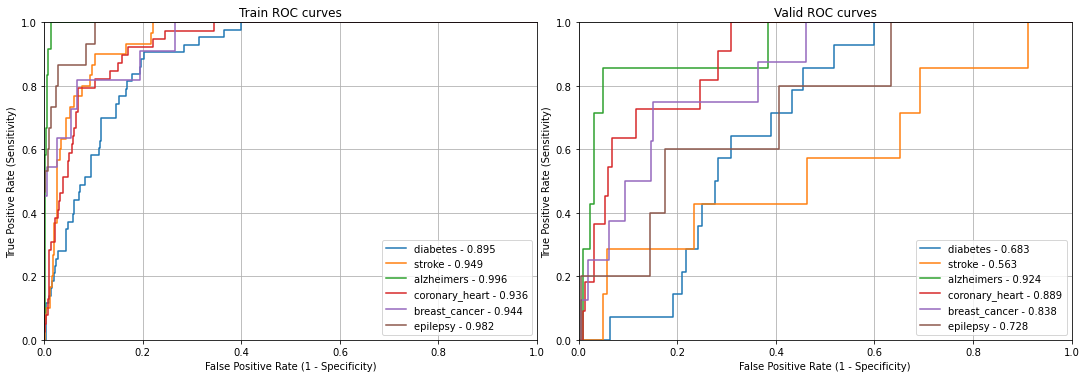

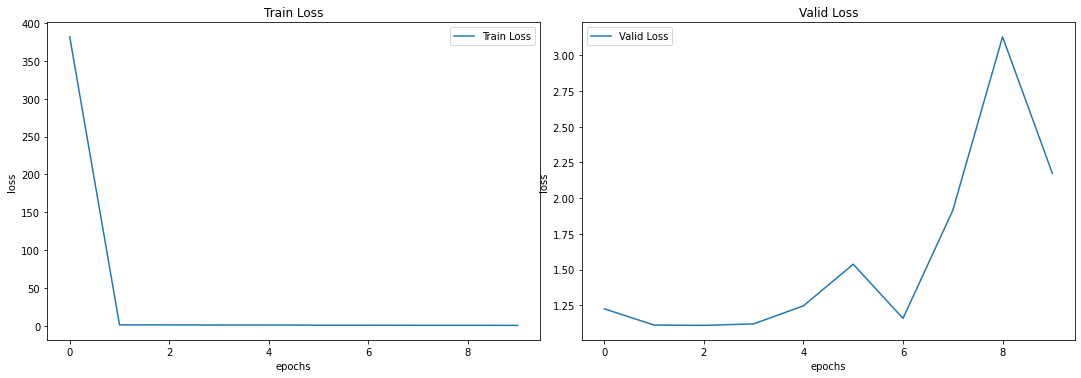

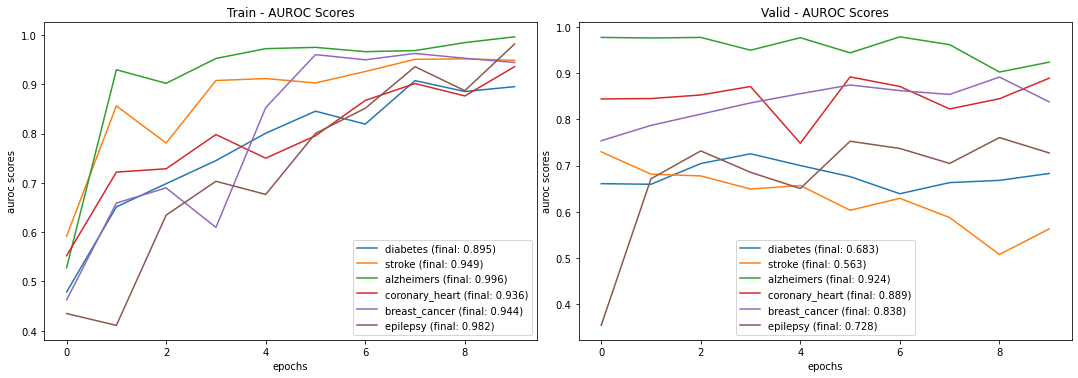

In [ ]:
cnn_base.fit(10, verbosity=.35)

Run a few more epochs - so load model from checkpoint

From "/home/vinod/.lemonpie/models/cnn_base/checkpoint.tar", loading model ...
loading optimizer and epoch_index ...
epoch |     train loss |     train aurocs                  valid loss |     valid aurocs    
----------------------------------------------------------------------------------------------------
   10 |          0.435 | [0.929 0.953 0.980 0.952]              3.949 | [0.664 0.529 0.906 0.881]
   12 |          0.447 | [0.929 0.968 0.987 0.930]              2.682 | [0.492 0.556 0.933 0.860]
   14 |          0.312 | [0.955 0.980 0.995 0.968]              6.762 | [0.653 0.515 0.916 0.881]
Checkpointed to "/home/vinod/.lemonpie/models/cnn_base/checkpoint.tar"
Saved experiment to /home/vinod/.lemonpie/experiments/cnn_base/cnn_base.experiment


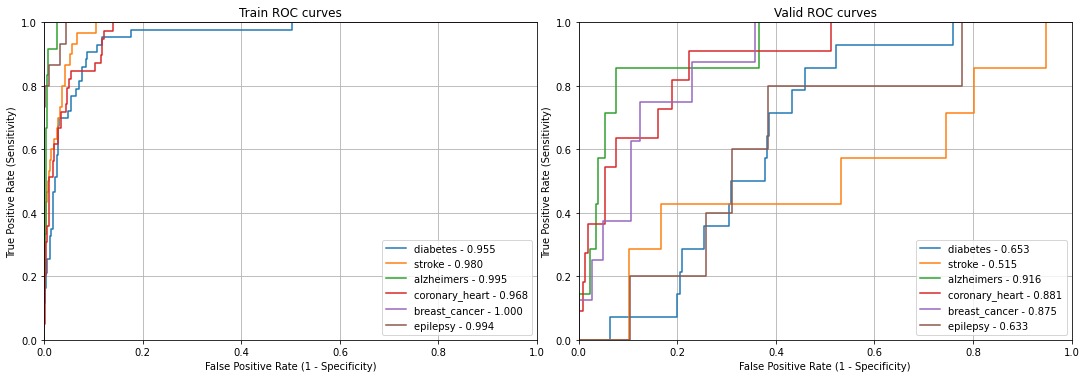

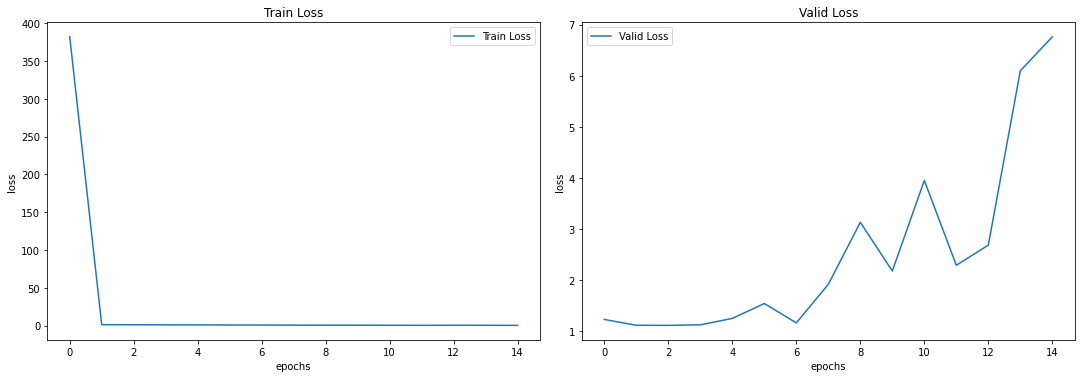

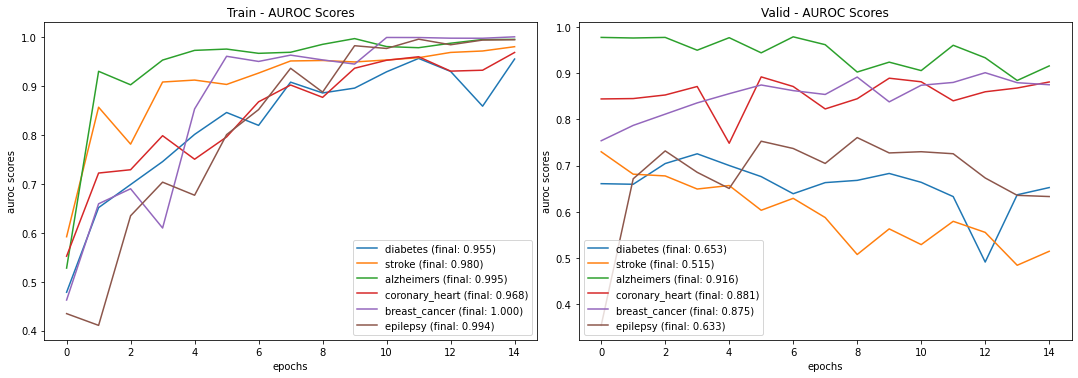

In [ ]:
cnn_base.fit(5, from_checkpoint=True)

From "/home/vinod/.lemonpie/models/cnn_base/checkpoint.tar", loading model ...
test loss = 7.087093830108643
test aurocs = [0.642788 0.799513 0.885007 0.827516 0.843348 0.585837]

Prediction Summary ...
                auroc_score  optimal_threshold     auroc_95_ci
diabetes           0.642788       1.425134e-10   (0.52, 0.756)
stroke             0.799513       1.317986e-02  (0.624, 0.944)
alzheimers         0.885007       4.320452e-02   (0.751, 0.97)
coronary_heart     0.827516       5.309725e-02  (0.703, 0.922)
breast_cancer      0.843348       1.303062e-02  (0.764, 0.915)
epilepsy           0.585837       1.532695e-01  (0.201, 0.957)
Saved experiment to /home/vinod/.lemonpie/experiments/cnn_base/cnn_base.experiment


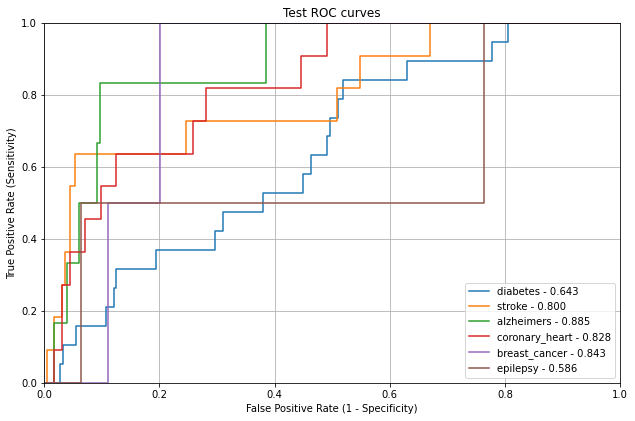

In [ ]:
cnn_base.predict()